In [1]:
import ugradio
import ugradio.timing as time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy
from astropy.table import Table

%matplotlib inline
plt.rcParams['mathtext.fontset'], plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 17})

# 6.1 The Receiving System

### 6.1.2 Analog Down Converter

In [2]:
test=np.load('test.npy')

In [3]:
print(np.allclose(test[0], test[1]))

data = test[0] + 1j * test[1]

fft = np.fft.fftshift(np.fft.fft(data))
power = np.abs(fft)**2
freqs = np.fft.fftshift(np.fft.fftfreq(16000, 1/62.5))
print(test)

False
[[[ 768  768  256 ...  768    0 1536]]

 [[ 512    0  256 ... 1792 -768  768]]]


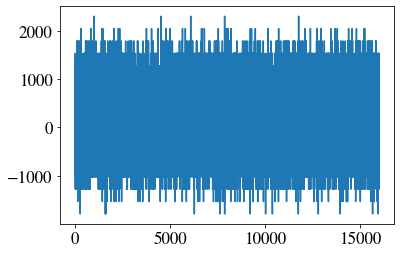

In [4]:
plt.plot(test[0,0] - test[1,0])

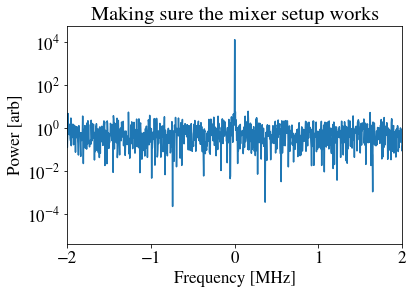

In [5]:
plt.semilogy(freqs, power[0]/2**32)
plt.xlim(-2,2)
plt.title('Making sure the mixer setup works')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Power [arb]')
# plt.vlines(0.)
plt.show()

In [6]:
#np.save('Data_lab2/test.npy', test) #Confirms mixer setup works --- we see a peak at 0.5, as expected

## 6.2 Your Measurement

In [7]:
#zenith = ugradio.pico.capture_data('50mV', dual_mode=True, divisor=1)
# pointing the horn directly at zenith
zenith=np.load('zenith.npy')

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:854: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:1959: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


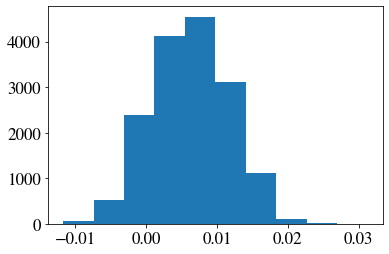

In [8]:
zenith_data = zenith[0] + 1j*zenith[1]

flattened = (zenith_data/2**16).flatten()

plt.hist(flattened, bins=10)
plt.show()

### 6.2.1 Planning Observations

### 6.2.2 Two Frequency-Switched Line Measurements (long integration)

In [9]:
# d = np.array([])
# a = np.ones((2, 1, 16000))
# b = np.ones((2, 1, 16000))
# d = np.append(d, )

In [10]:
# data = np.array([])
# for i in range(10):
#     line_off_data = ugradio.pico.capture_data('50mV', dual_mode=True, divisor=1, nblocks=1000)
#     data = np.append(line_off_data)

In [11]:
#from tqdm import tqdm

In [12]:
#data = []
#for i in tqdm(range(10)):
    #line_off_data = ugradio.pico.capture_data('50mV', dual_mode=True, divisor=1, nblocks=100)
    #data.append(line_off_data)


## PICOSAMPLER

In [13]:
final_data=np.load('picosampler_off.npy')
fft=np.fft.fft(final_data/2**16)
power=np.abs(fft)**2
avg_off=np.mean(power,axis=0)
freqs=np.fft.fftshift(np.fft.fftfreq(16000,1/62.5e6))
#np.save('picosampler_off.npy',final_data)
#np.save('picosampler_on.npy',final_data)


In [14]:
final_data=np.load('picosampler_on.npy')
fft=np.fft.fft(final_data/2**16)
power=np.abs(fft)**2
avg_on=np.mean(power,axis=0)
freqs=np.fft.fftshift(np.fft.fftfreq(16000,1/62.5e6))
#np.save('picosampler_off.npy',final_data)

Text(0.5, 1.0, '$s_{on}$ vs $s_{off}$ upper half')

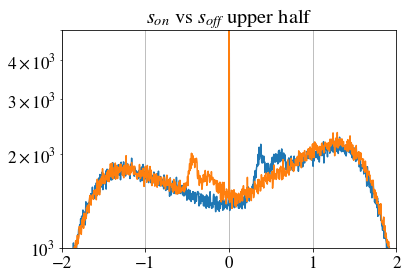

In [15]:
plt.semilogy(freqs/1e6,np.fft.fftshift(avg_on))
plt.semilogy(freqs/1e6,np.fft.fftshift(avg_off))
#plt.plot(freqs/1e6,np.fft.fftshift(avg_on/avg_off))
plt.xlim(-2,2)
#plt.ylim(0.5,1.5
plt.grid()
plt.ylim(10**3,5*10**3)
plt.title('$s_{on}$ vs $s_{off}$ upper half')


## SDR

In [59]:
data_on=np.load('on_line_raw.npy')
data_off=np.load('off_line_raw.npy')
fft=np.fft.fft(data_on)
power=np.abs(fft)**2
avg_on=np.mean(power,axis=0)
freqs=np.fft.fftshift(np.fft.fftfreq(2048,1/2.2e6))

In [60]:
fft=np.fft.fft(data_off)
power=np.abs(fft)**2
avg_off=np.mean(power,axis=0)
freqs=np.fft.fftshift(np.fft.fftfreq(2048,1/2.2e6))

(-1000000.0, 1000000.0)

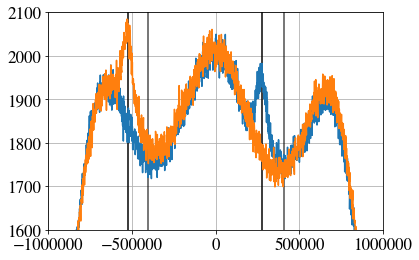

In [61]:
plt.plot(freqs,np.fft.fftshift(avg_on*1.19))
plt.plot(freqs,np.fft.fftshift(avg_off*1.19))
plt.vlines(0.275e6,0,2500)
plt.vlines(-0.525e6,0,2500)
plt.vlines(-0.4058e6,0,2500,alpha=0.7)
plt.vlines(0.4058e6,0,2500,alpha=0.7)
plt.ylim(1600,2100)
plt.grid()
plt.xlim(-1e6,1e6)

In [62]:
raw_sky=np.load('cold_raw_zenith.npy').reshape(-1,2048)
blackbody_raw=np.load('cal_raw_zenith.npy')


In [63]:
fft=np.fft.fft(raw_sky)
power=np.abs(fft)**2
avg_raw=np.mean(power,axis=0)
freqs=np.fft.fftshift(np.fft.fftfreq(2048,1/2.2e6))

In [64]:
fft=np.fft.fft(blackbody_raw)
power=np.abs(fft)**2
avg_bb=np.mean(power,axis=0)
freqs=np.fft.fftshift(np.fft.fftfreq(2048,1/2.2e6))

Text(0.5, 1.0, 'Comparison of calibration measurements')

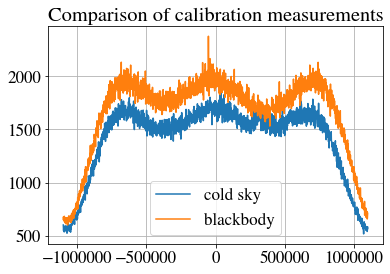

In [65]:
plt.plot(freqs,np.fft.fftshift(avg_raw),label='cold sky')
plt.plot(freqs,np.fft.fftshift(avg_bb),label='blackbody')
300/((np.mean(avg_bb[0:1296]-avg_raw[0:1296])+np.mean(avg_bb[1396:]-avg_raw[1396:]))/2)
plt.legend()
plt.grid()
plt.title('Comparison of calibration measurements')

In [66]:
data=[]
for i in range(len(avg_raw)):
    data.append(avg_bb-avg_raw)

1/(np.sum(avg_raw)/np.sum(data)*300)

1.1795324906759206

Text(0.5, 1.0, '$s_{on}$ Upper Half')

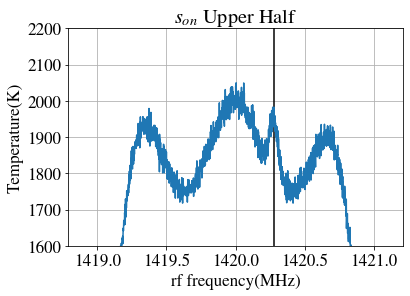

In [67]:
plt.plot((freqs+1420e6)/1e6,np.fft.fftshift(avg_on*1.19))
#plt.plot(freqs,np.fft.fftshift(avg_off*1.19))
plt.vlines(1420.275,0,2500)
#plt.vlines(-0.525e6,0,2500)
plt.ylim(1600,2200)
plt.grid()
plt.ylabel('Temperature(K)')
plt.xlabel('rf frequency(MHz)')
plt.title('$s_{on}$ Upper Half')

Text(0.5, 1.0, '$s_{on}$ Lower Half')

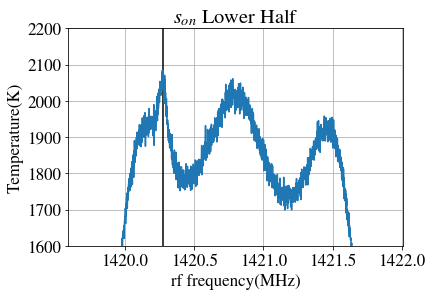

In [68]:
plt.plot((freqs+1420.8e6)/1e6,np.fft.fftshift(avg_off*1.19))
#plt.vlines(0.275e6,0,2500)
plt.vlines(1420.275,0,2500)
plt.ylim(1600,2200)
plt.grid()
plt.ylabel('Temperature(K)')
plt.xlabel('rf frequency(MHz)')
plt.title('$s_{on}$ Lower Half')

Text(0.5, 0, 'Frequnecy(Hz)')

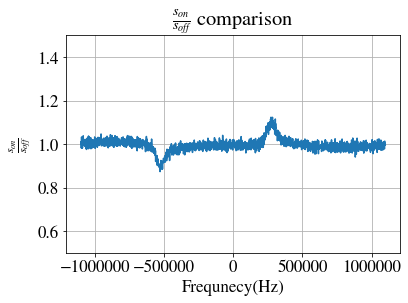

In [69]:
plt.plot(freqs,np.fft.fftshift((avg_on/avg_off)))
plt.grid()
plt.ylim(0.5,1.5)
plt.title('$\\frac{s_{on}}{s_{off}}$ comparison')
plt.ylabel('$\\frac{s_{on}}{s_{off}}$')
plt.xlabel('Frequnecy(Hz)')

Text(0.5, 1.0, 'Intensity vs Doppler velocity $s_{on}$')

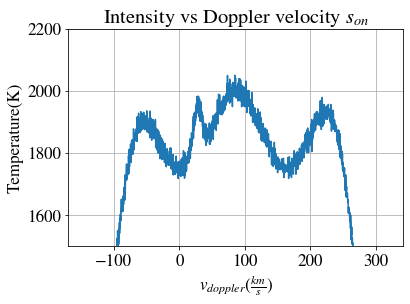

In [70]:
r_f_plus=freqs+1420e6
doppler_v=3e5*(1420.4058e6-r_f_plus)/(1420.4058e6)## doppler correction
plt.plot(doppler_v,np.fft.fftshift(avg_on*1.19))
plt.grid()
plt.ylim(1500,2200)
plt.xlabel('$v_{doppler} (\\frac{km}{s})$')
plt.ylabel('Temperature(K)')
plt.title('Intensity vs Doppler velocity $s_{on}$')


Text(0.5, 1.0, 'Intensity vs Doppler velocity $s_{off}$')

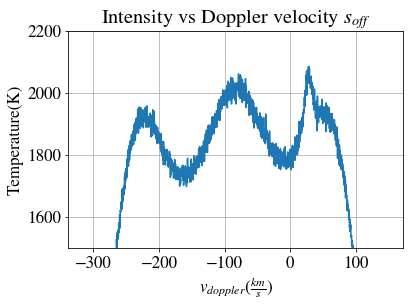

In [71]:
r_f_minus=freqs+1420.8e6
doppler_v=3e5*(1420.4058e6-r_f_minus)/(1420.4058e6) ## doppler correction using doppler formula
plt.plot(doppler_v,np.fft.fftshift(avg_off*1.19))
plt.grid()
plt.ylim(1500,2200)
plt.xlabel('$v_{doppler} (\\frac{km}{s})$')
plt.ylabel('Temperature(K)')
plt.title('Intensity vs Doppler velocity $s_{off}$')

8.458588496207671

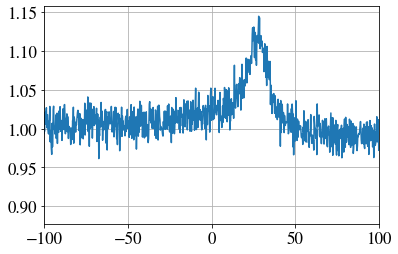

In [74]:
plt.plot(doppler_v,np.fft.fftshift(avg_off/avg_on))
s_line=avg_off/avg_on*1.17
plt.xlim(-100,100)
plt.grid()
v_21cm=doppler_v[np.argmax(np.fft.fftshift(s_line))]
v_21cm+correction


### 6.2.3 Two Frequency Switched Reference Measurements (short integration)

In [ ]:
ugradio.doppler.get_projected_velocity?

In [75]:
correction=ugradio.doppler.get_projected_velocity(1.23,37.873199,2459627.65).value/1000

Text(0, 0.5, '$s_{line}$')

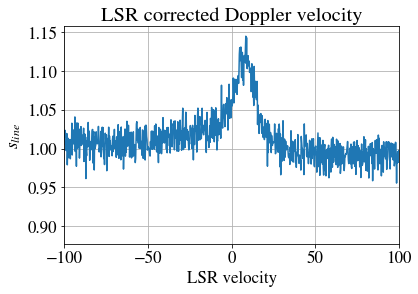

In [77]:
plt.plot(doppler_v+correction,np.fft.fftshift(avg_off/avg_on))
plt.xlim(-100,100)
plt.grid()
plt.title('LSR corrected Doppler velocity')
plt.xlabel('LSR velocity')
plt.ylabel('$s_{line}$')


## Section 8

In [78]:
##IGNORE THIS-MESSING AROUND
RA_to_gal=np.array([(-0.054876,-0.873437,-0.483835),(0.494109,-0.444830,0.746982),(-0.867666,-0.198076,0.455984)])
inv_RA_to_gal=np.linalg.inv(RA_to_gal)
l=120
b=0
g_z=np.sin(b)
g_y=np.cos(0)*np.cos(120)
g_x=np.cos(0)*np.sin(120)
g=np.array([g_x,g_y,g_z])
ra_dec=np.dot(inv_RA_to_gal,g)
np.arctan(ra_dec[1]/ra_dec[0])

-1.1679705413468515

In [79]:
#GETTING COORDINATES WITH ASTROPY
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord,AltAz
from astropy.coordinates import EarthLocation
c = SkyCoord(ra=6.45087388 *u.degree, dec=62.72563568*u.degree, frame='icrs')
print(c.galactic)
loc = EarthLocation(lat = 37.8715*u.deg, lon = 122.2730*u.deg, height = 122*u.m) # current location
time = Time('2022-02-21 13:05:00')# time we took data
cAltAz = c.transform_to(AltAz(obstime = time, location = loc))
cAltAz

<SkyCoord (Galactic): (l, b) in deg
    (120.00001044, -9.25693318e-05)>


<SkyCoord (AltAz: obstime=2022-02-21 13:05:00.000, location=(-2691819.01311532, 4262482.48020279, 3894269.71432397) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (329.9004989, 27.64116233)>

In [80]:
blackbody=np.load('data2_cal_raw.npy')
sky=np.load('data2_on_raw.npy')

281.15554305959904


Text(0.5, 1.0, 'Comparison of calibration measurements')

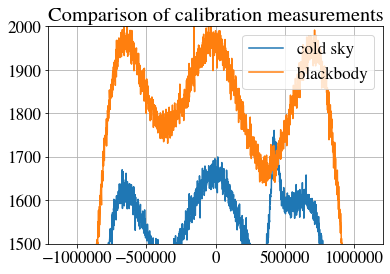

In [81]:
fft=np.fft.fft(sky)
power=np.abs(fft)**2
avg_raw=np.mean(power,axis=0)
freqs=np.fft.fftshift(np.fft.fftfreq(2048,1/2.2e6))
fft=np.fft.fft(blackbody)
power=np.abs(fft)**2
avg_bb=np.mean(power,axis=0)
freqs=np.fft.fftshift(np.fft.fftfreq(2048,1/2.2e6))
plt.plot(freqs,np.fft.fftshift(avg_raw),label='cold sky')
plt.plot(freqs,np.fft.fftshift(avg_bb),label='blackbody')
plt.legend()
plt.ylim(1500,2000)
plt.grid()
print(np.mean(avg_bb-avg_raw))
plt.title('Comparison of calibration measurements')

In [82]:
on=np.load('galactic_coords_online_raw.npy')
off=np.load('galactic_coords_offline_raw.npy')

In [83]:
fft=np.fft.fft(on)
power=np.abs(fft)**2
avg_on=np.mean(power,axis=0)
freqs=np.fft.fftshift(np.fft.fftfreq(2048,1/2.2e6))


In [84]:
fft=np.fft.fft(off)
power=np.abs(fft)**2
avg_off=np.mean(power,axis=0)
freqs=np.fft.fftshift(np.fft.fftfreq(2048,1/2.2e6))

Text(0.5, 0, 'Frequnecy(Hz)')

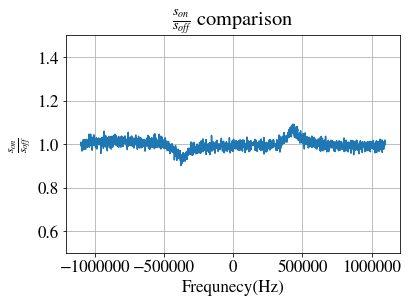

In [85]:
plt.plot(freqs,np.fft.fftshift((avg_on/avg_off)))
plt.grid()
plt.ylim(0.5,1.5)
plt.title('$\\frac{s_{on}}{s_{off}}$ comparison')
plt.ylabel('$\\frac{s_{on}}{s_{off}}$')
plt.xlabel('Frequnecy(Hz)')

(1000, 2000)

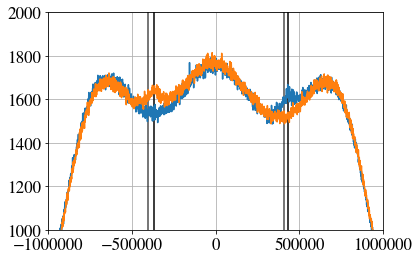

In [86]:
plt.plot(freqs,np.fft.fftshift(avg_on*1.04))
plt.plot(freqs,np.fft.fftshift(avg_off*1.04))
plt.vlines(0.435e6,0,2500)
plt.vlines(-0.365e6,0,2500)
plt.vlines(-0.4058e6,0,2500,alpha=0.7)
plt.vlines(0.4058e6,0,2500,alpha=0.7)
plt.grid()
plt.xlim(-1e6,1e6)
plt.ylim(1000,2000)

Text(0.5, 1.0, 'Intensity vs Doppler velocity $s_{off}$')

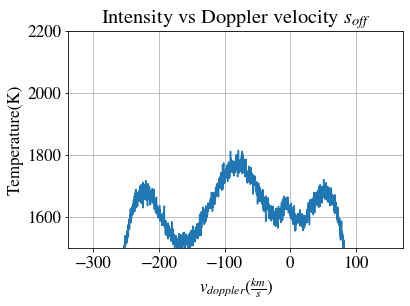

In [87]:
doppler_v=3e5*(1420.4058e6-r_f_minus)/(1420.4058e6) ## doppler correction using doppler formula

plt.plot(doppler_v,np.fft.fftshift(avg_off*1.04))
plt.grid()
plt.ylim(1500,2200)
plt.xlabel('$v_{doppler} (\\frac{km}{s})$')
plt.ylabel('Temperature(K)')
plt.title('Intensity vs Doppler velocity $s_{off}$')

Text(0.5, 1.0, 'Intensity vs Doppler velocity $s_{on}$')

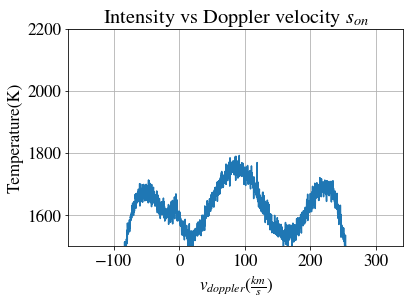

In [88]:
doppler_v=3e5*(1420.4058e6-r_f_plus)/(1420.4058e6)## doppler correction

plt.plot(doppler_v,np.fft.fftshift(avg_on*1.04))
plt.grid()
plt.ylim(1500,2200)
plt.xlabel('$v_{doppler} (\\frac{km}{s})$')
plt.ylabel('Temperature(K)')
plt.title('Intensity vs Doppler velocity $s_{on}$')

In [89]:
correction=ugradio.doppler.get_projected_velocity(23.03,37.873199,2459627.65).value/1000

In [90]:
correction

-25.41649044617845

-31.14235193942214

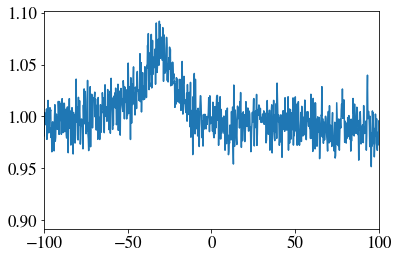

In [107]:
s_line=avg_on/avg_off
plt.plot(doppler_v+correction,np.fft.fftshift(s_line))
plt.xlim(-100,100)
doppler_v[np.argmax(np.fft.fftshift(s_line))]+correction